<a href="https://colab.research.google.com/github/smo216/Machine-Learning-Project/blob/master/Machine_Learning_Final_Project_Image_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#load multiple data
"""Utilize histogram matching to normalize images? https://scikit-image.org/docs/stable/auto_examples/transform/plot_histogram_matching.html#sphx-glr-auto-examples-transform-plot-histogram-matching-py"""
## For Image portion

from google.colab import drive
drive.mount('/content/gdrive')
from PIL import Image
from pylab import *
# importing os module 
import os 
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2
from skimage.io import imread_collection
from skimage.util import img_as_ubyte
from skimage import data
from skimage.exposure import histogram

path="//content//gdrive//My Drive//PhD SEM Images//UAB//HP-14"
os.chdir(path)
#print(os.getcwd()) 
col=imread_collection('*.tif') #grab all files with .tif format

L=len(col)
#print(L)
cropcol=[]
#for L1 in range(L):
#  cropcol.append(col[L1])
scaleim=array(col[:])
#imscale=array(cropcol[:]) #convert to np array
cropim=scaleim[:,0:4095,:] #crop array to remove scalebar

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


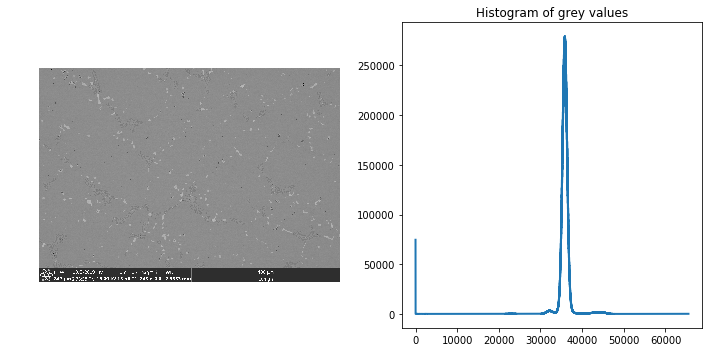

In [35]:
"""Aggregated Histogram of Dataset- BSE image contrast is related to atomic # of phases"""
#plot Histogram

histim=cropim

hist, hist_centers = histogram(histim) #aggregated histogram

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].imshow(scaleim[1], cmap=plt.cm.gray) #example image
ax[0].axis('off')

ax[1].plot(hist_centers, hist, lw=2)
ax[1].set_title('Histogram of grey values')

plt.tight_layout()


In [36]:
"""Split dataset into Test/Train"""
print(type(cropim))

#plt.imshow(cropdcol1[6,:,:], cmap=plt.cm.gray)
cropim.shape

split=round(L*.7) #70% of dataset for training vs testing
train,test =cropim[:split,:,:],cropim[split:,:,:]
#print(train)

train.shape

test.shape

<class 'numpy.ndarray'>


(5, 4095, 6144)

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


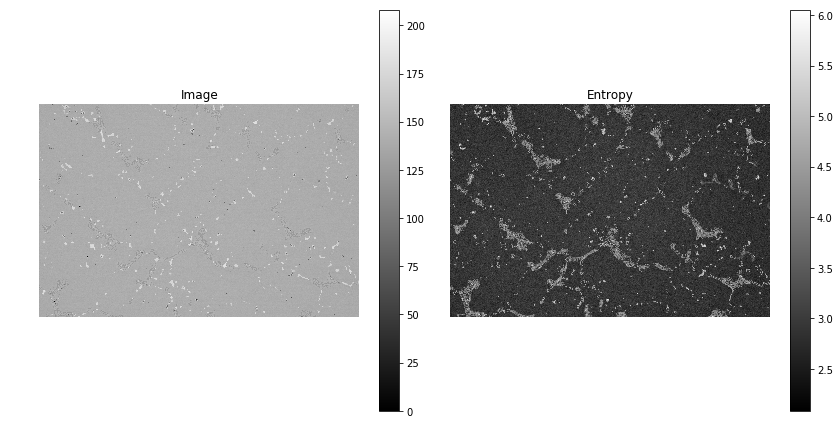

In [37]:
from skimage import data
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import img_as_ubyte
import skimage

entim=cropim[1] #what image to take entropy of

image = skimage.img_as_ubyte(entim) #8 bit
#image=cropim #16 bit=very slow

fig, ax = plt.subplots(ncols=2, figsize=(12, 6), sharex=True, sharey=True)

fig.colorbar(ax[0].imshow(image, cmap=plt.cm.gray), ax=ax[0])
ax[0].set_title('Image')

fig.colorbar(ax[1].imshow(entropy(image, disk(5)), cmap=plt.cm.gray), ax=ax[1])
ax[1].set_title('Entropy')

for a in ax:
    a.axis('off')

plt.tight_layout()

(-0.5, 6143.5, 4094.5, -0.5)

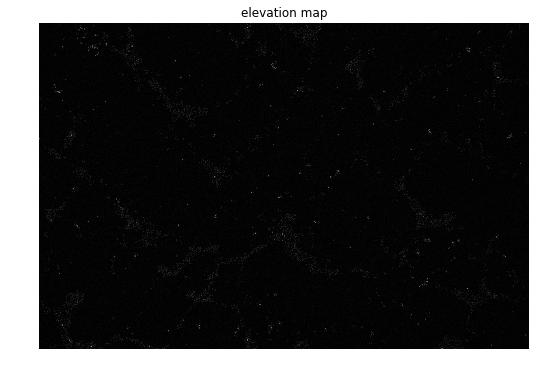

In [38]:
from scipy import ndimage
#Edge Detection
im=image

from skimage.filters import sobel

elevation_map = sobel(im)

fig, ax = plt.subplots(figsize=(12, 6))
ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('elevation map')
ax.axis('off')

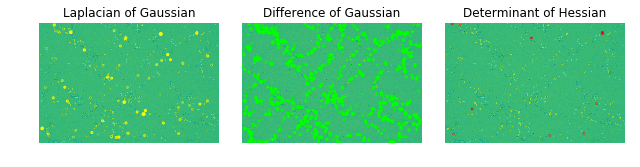

In [39]:
#Blob Detection
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


image_gray = im

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

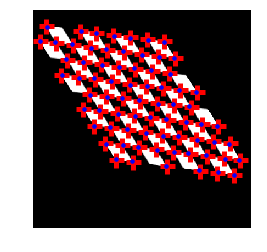

In [0]:
#Feature Detection- work in progress
from matplotlib import pyplot as plt

from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform


tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7,
                        translation=(210, 50))
image = warp(data.checkerboard(), tform.inverse, output_shape=(350, 350))

coords = corner_peaks(corner_harris(image), min_distance=5)
coords_subpix = corner_subpix(image, coords, window_size=13)

plt.gray()
plt.imshow(image, interpolation='nearest')
plt.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15, mew=5)
plt.plot(coords[:, 1], coords[:, 0], '.b', markersize=7)
plt.axis('off')
plt.show()